In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src import load_news_data, clean_text, get_publication_frequency, plot_distribution, plot_bar
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [18]:
# Load news data
news_df = load_news_data('data/raw_analyst_ratings.csv')

Columns in the dataset: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

First few rows:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock 

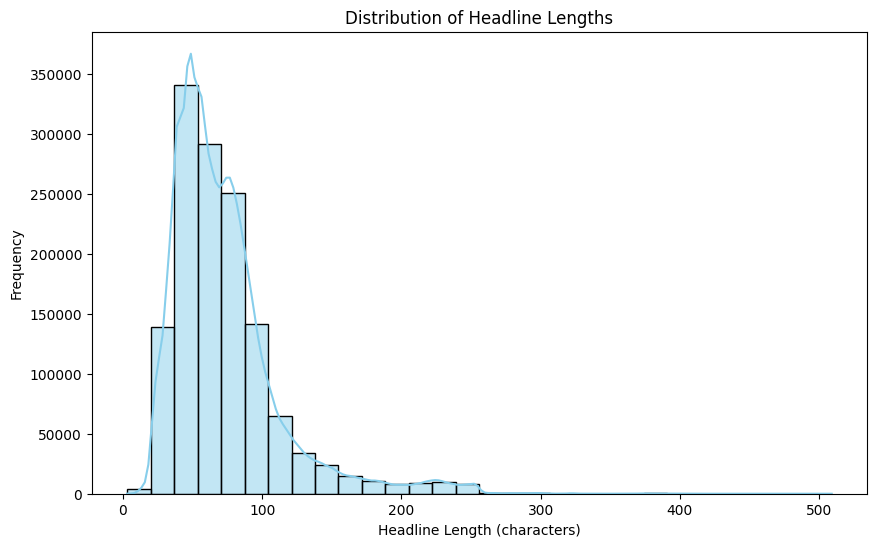

In [19]:
# Headline length distribution
plot_distribution(
    news_df['headline_length'],
    title='Distribution of Headline Lengths',
    xlabel='Headline Length (characters)',
    ylabel='Frequency',
    filename='../plots/headline_length_distribution.png'
)

Top 10 Publishers by Article Count:
 publisher
Paul Quintaro        224161
Lisa Levin           174571
Benzinga Newsdesk    135734
Charles Gross         94942
Monica Gerson         81769
Eddie Staley          56251
Hal Lindon            47577
Juan Lopez            28399
Benzinga Staff        28108
ETF Professor         24127
Name: count, dtype: int64


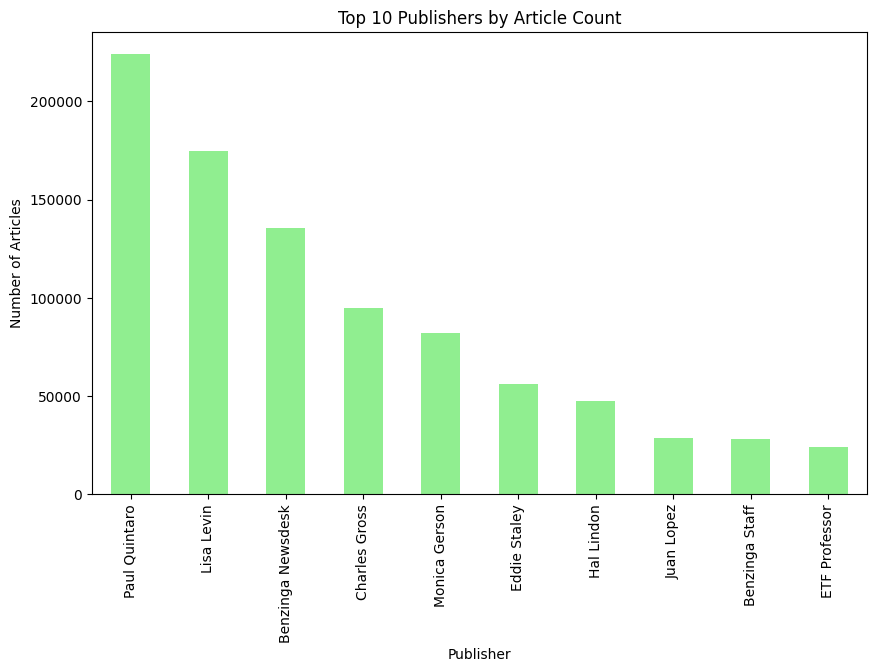

In [21]:
# Articles per publisher
publisher_counts = news_df['publisher'].value_counts().head(10)
print("Top 10 Publishers by Article Count:\n", publisher_counts)
plot_bar(
    publisher_counts,
    title='Top 10 Publishers by Article Count',
    xlabel='Publisher',
    ylabel='Number of Articles',
    filename='../plots/top_publishers.png'
)

FileNotFoundError: [Errno 2] No such file or directory: '../plots/publication_frequency.png'

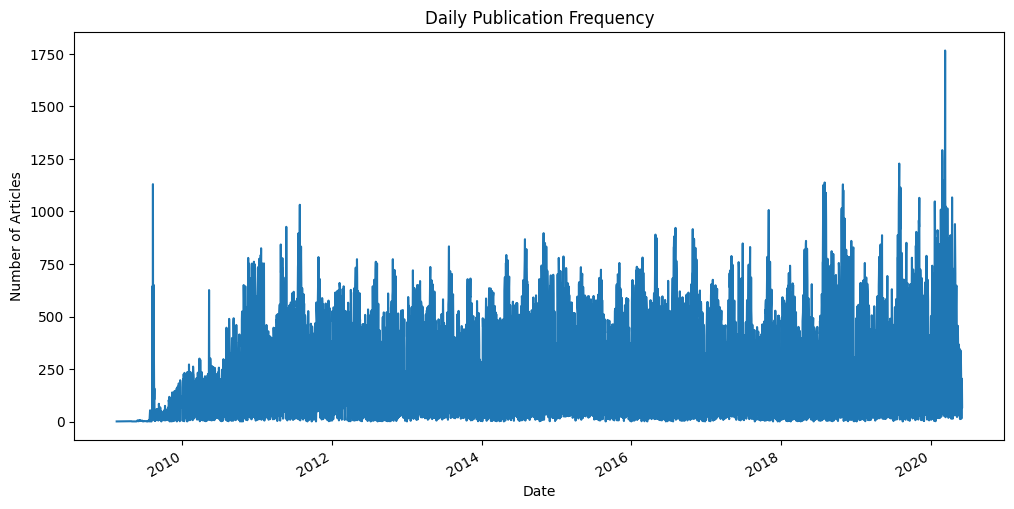

In [22]:
# 2. Time Series Analysis
# Daily publication frequency
daily_freq = get_publication_frequency(news_df, freq='D')
plt.figure(figsize=(12, 6))
daily_freq.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.savefig('../plots/publication_frequency.png')
plt.show()

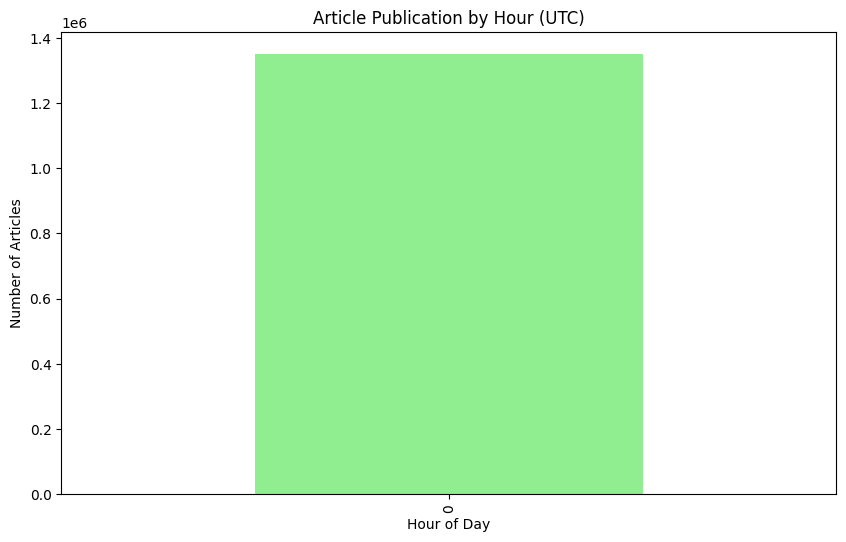

In [23]:
# Hourly publication analysis
news_df['hour'] = news_df['date'].dt.hour
hourly_counts = news_df.groupby('hour').size()
plot_bar(
    hourly_counts,
    title='Article Publication by Hour (UTC)',
    xlabel='Hour of Day',
    ylabel='Number of Articles',
    filename='../plots/hourly_publication.png'
)

In [24]:
# 3. Text Analysis (Keyword Extraction)
stop_words = set(stopwords.words('english'))

def extract_keywords(headline):
    words = word_tokenize(clean_text(headline))
    return [word for word in words if word not in stop_words and len(word) > 2]

# Extract and count keywords
all_keywords = []
for headline in news_df['headline']:
    all_keywords.extend(extract_keywords(headline))
keyword_counts = Counter(all_keywords).most_common(10)
print("Top 10 Keywords:\n", keyword_counts)

# Plot top keywords
top_keywords = dict(keyword_counts)
plt.figure(figsize=(10, 6))
plt.bar(top_keywords.keys(), top_keywords.values(), color='purple')
plt.title('Top 10 Keywords in Headlines')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.savefig('../plots/top_keywords.png')
plt.show()

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Yoga i7/nltk_data'
    - 'd:\\Documents\\Projects\\10 Academy\\week-1\\.venv\\nltk_data'
    - 'd:\\Documents\\Projects\\10 Academy\\week-1\\.venv\\share\\nltk_data'
    - 'd:\\Documents\\Projects\\10 Academy\\week-1\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\Yoga i7\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


Top 10 Domains:
 domain
Paul Quintaro        224161
Lisa Levin           174571
Benzinga Newsdesk    135734
Charles Gross         94942
Monica Gerson         81769
Eddie Staley          56251
Hal Lindon            47577
Juan Lopez            28399
Benzinga Staff        28108
ETF Professor         24127
Name: count, dtype: int64


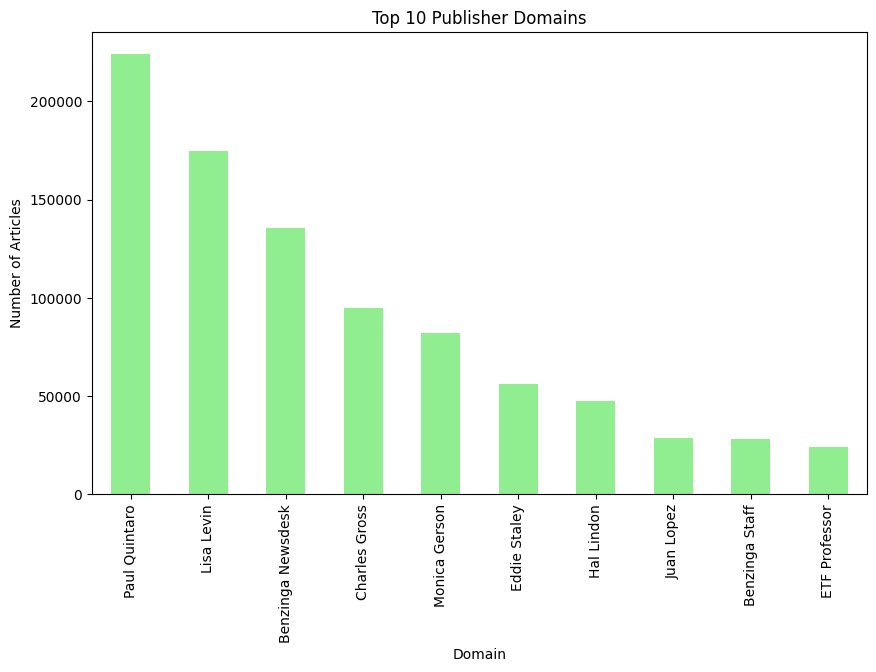

In [25]:
# 4. Publisher Analysis (Domain Extraction)
news_df['domain'] = news_df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else x)
domain_counts = news_df['domain'].value_counts().head(10)
print("Top 10 Domains:\n", domain_counts)
plot_bar(
    domain_counts,
    title='Top 10 Publisher Domains',
    xlabel='Domain',
    ylabel='Number of Articles',
    filename='../plots/top_domains.png'
)